In [1]:
import os
import pandas as pd
import sys
import plotly.graph_objects as go
import statsmodels.api as sm

In [2]:
sys.path.append(os.path.abspath('../..'))

In [3]:
from analysis.preprocessing import load_and_clean_glaciers_data, load_and_clean_sealevel_data

# Charger les données

df_glaciers = load_and_clean_glaciers_data()
df_sea = load_and_clean_sealevel_data()

# Extraire l'année depuis Day
df_sea["Year"] = pd.to_datetime(df_sea["Day"]).dt.year

# Calculer la moyenne des trois mesures du niveau de la mer

df_sea["sea_level_avg"] = df_sea[[
    "sea_level_church_and_white_2011",
    "sea_level_uhslc",
    "sea_level_average"
]].mean(axis=1)

# Garder uniquement Year et la moyenne
df_sea = df_sea[["Year", "sea_level_avg"]]

# Fusionner avec les glaciers sur Year
df_combined = df_glaciers.merge(df_sea, on="Year", how="inner")

print(df_combined.head())



   Year  Mean cumulative mass balance  Number of observations  sea_level_avg
0  1956                         0.000                     NaN      -82.38073
1  1956                         0.000                     NaN      -82.38073
2  1956                         0.000                     NaN      -86.58073
3  1956                         0.000                     NaN      -90.01406
4  1957                        -0.094                    12.0      -83.01406


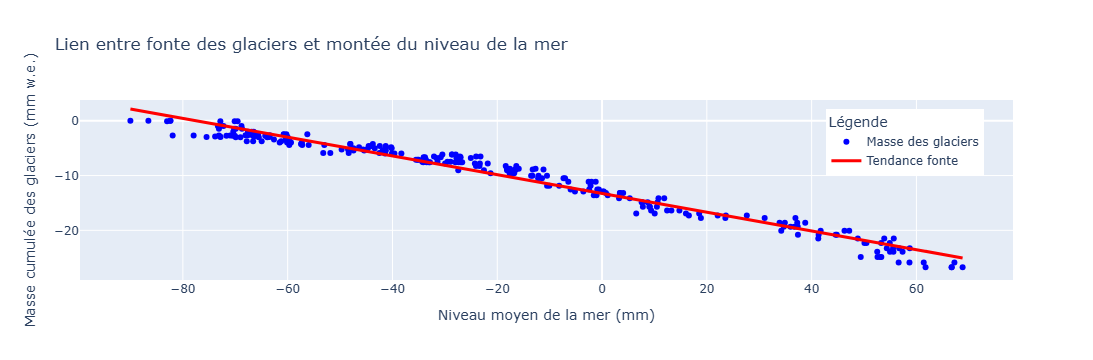

In [ ]:

# Préparer x et y pour le graphique

x = df_combined["sea_level_avg"]  
y = df_combined["Mean cumulative mass balance"]  

# Calculer la régression linéaire

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Créer le graphique
fig = go.Figure()

# Nuage de points (observations réelles)
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="markers",
    name="Masse des glaciers",
    marker=dict(color="blue")
))

# Ligne de régression (tendance)
fig.add_trace(go.Scatter(
    x=x,
    y=y_pred,
    mode="lines",
    name="Impact de la fonte des glaciers sur le niveau",
    line=dict(color="orange", width=3)
))

# Mettre à jour le layout

fig.update_layout(
    title="Lien entre fonte des glaciers et montée du niveau de la mer",
    xaxis_title="Niveau moyen de la mer (mm)",
    yaxis_title="Masse cumulée des glaciers (mm w.e.)",
    legend=dict(
        title="Légende",
        x=0.8,
        y=0.95
    )
)
# Afficher le graphique
fig.show()
